Import tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


Load in the data

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train shape: ", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape:  (60000, 28, 28)


Build the model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

Compile the model

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Train the model

In [7]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2943 - accuracy: 0.9134 - val_loss: 0.1380 - val_accuracy: 0.9569
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1440 - accuracy: 0.9573 - val_loss: 0.1036 - val_accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1092 - accuracy: 0.9672 - val_loss: 0.0885 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0905 - accuracy: 0.9714 - val_loss: 0.0781 - val_accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0768 - accuracy: 0.9759 - val_loss: 0.0763 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9786 - val_loss: 0.0727 - val_accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0590 - accuracy: 0.9814 - val_loss: 0.0767 - val_accuracy:

Plot loss per iteration

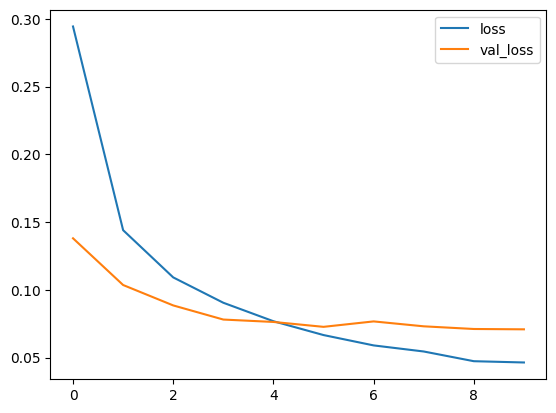

In [9]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

Plot the accuracy per iteration

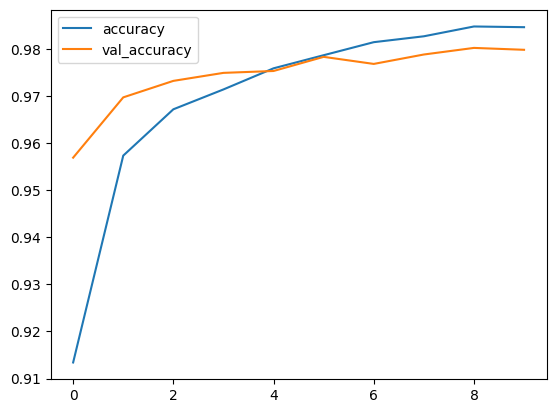

In [10]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

Evaluate the model (loss and accuracy)

In [11]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9798
[0.07087055593729019, 0.9797999858856201]


Plot confusion matrix

313/313 [==============================] - 1s 1ms/step
Confusion matrix, without normalization
[[ 973    0    2    0    0    0    1    1    3    0]
 [   0 1118    4    0    1    0    2    0   10    0]
 [   2    0 1017    0    1    0    1    7    4    0]
 [   0    0    7  990    0    1    2    3    4    3]
 [   1    0    5    1  955    0    4    1    3   12]
 [   3    0    0    8    1  870    5    0    4    1]
 [   4    2    2    1    3    3  941    0    2    0]
 [   3    1   13    5    1    0    0  999    3    3]
 [   6    0    4    2    2    1    1    3  954    1]
 [   1    2    0    3    6    6    0    5    5  981]]


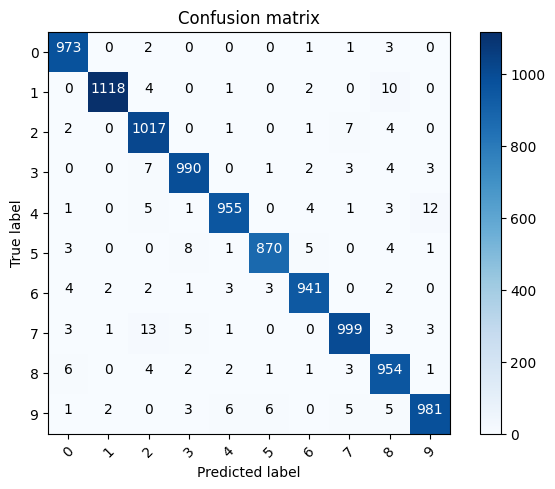

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

Show some misclassified examples

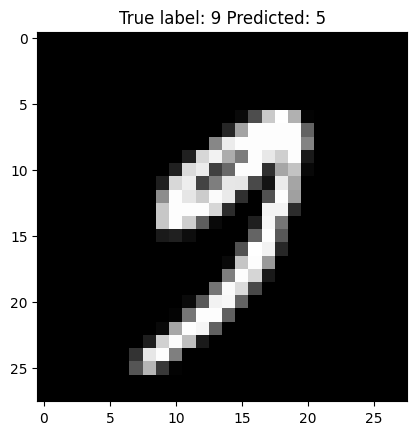

In [22]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));